<a href="https://colab.research.google.com/github/Alan-Roza/Processamento-de-Imagens/blob/main/Histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Renato Moraes Silva</center></font>
<br/>
<br/>

# Transformações geométricas

Neste notebook, iremos fazer algumas operações envolvendo cores.

Primeiro, iremos importar as principais bibliotecas.

In [1]:
import numpy as np
import cv2  
import os
import urllib.request
import matplotlib.pyplot as plt

## Escalamento

Para o escalamento, precisamos usar a função **resize** que recebe os seguintes argumentos:
- src: a imagem
- dsize: tamanho desejado da nova imagem. Exemplo: (2,3)
- fx: fator de escala em relação ao eixo horizontal
- fy: fator de escala em relação ao eixo vertical
- interpolation: método de interpolação 
     - cv2.INTER_NEAREST: vizinho mais próximo
     - cv2.INTER_LINEAR: interpolação bilinear
     - cv2.INTER_CUBIC: interpolação bicúbica
     
Se você tentar redimensionar usando escala, defina o parâmetro **dsize** como nulo.

Para testar esse método, crie uma imagem quadriculada em tons de cinza usando operações matriciais: imagem preta com listras horizontais e verticais brancas. Depois, adicione o nome "Facens" nessa imagens. 

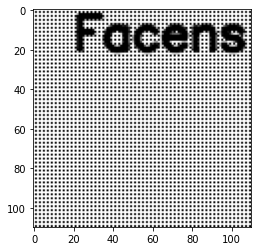

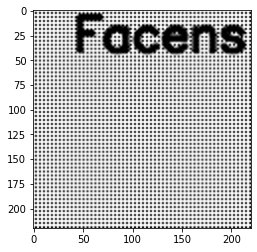

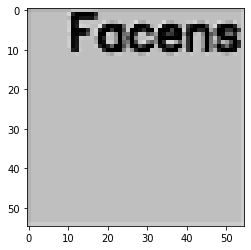

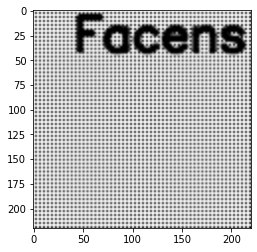

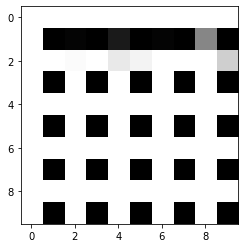

In [8]:
################# COMPLETE O CÓDIGO AQUI  #################
#  
    
img = np.zeros([110,110], dtype=np.uint8)
for i in range( 0, img.shape[0], 2 ):
    img[i,:] = 255
    
for i in range( 0, img.shape[1], 2 ):
    img[:,i] = 255
    
img = cv2.putText(img,text = "Facens", org = (20,20), fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                  fontScale = 0.8, color = [0,0,0], thickness = 2, lineType = cv2.LINE_AA)
    
img2 = cv2.resize(img, dsize = None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    
img3 = cv2.resize(img, dsize = None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)

img4 = cv2.resize(img, dsize = None,fx=2, fy=2, interpolation = cv2.INTER_LINEAR)

img5 = cv2.resize(img, dsize = None,fx=2, fy=2, interpolation = cv2.INTER_NEAREST)

img6 = cv2.resize(img, dsize = (10,10),fx=None, fy=None, interpolation = cv2.INTER_NEAREST)

##########################################################
    
# plota a imagem vermelha
plt.imshow(img, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(img2, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(img3, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(img4, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(img6, 'gray', vmin=0, vmax=255)
plt.show()


As operações de escala, rotação, translação ou cisalhamento também podem ser feitas usando transformação afim.

Para usar a transformação afim, use a função **warpAffine**. Os principais parâmetros são:
- src: imagem
- M: matriz afim. Ela deve ter dimensão 2 x 3. Portanto, não deve ser adicionada a terceira linha da matriz afim tradicional.
- dsize: tamanho da imagem de saída
- flags:  método de interpolação 
     - cv2.INTER_NEAREST: vizinho mais próximo
     - cv2.INTER_LINEAR: interpolação bilinear
     - cv2.INTER_CUBIC: interpolação bicúbica

Use uma operação afim para fazer a escala da imagem feita anteriormente. Faça um escalamento que aumente a imagem de 3 vezes e outro que diminua a imagem. 

A operação afim para escalamento é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1/S_x & 0 & 0\\
0 & 1/S_y & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

No entanto, na biblioteca OpenCV, é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
S_x & 0 & 0\\
0 & S_y & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

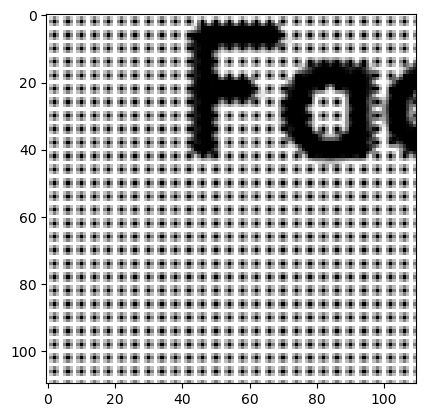

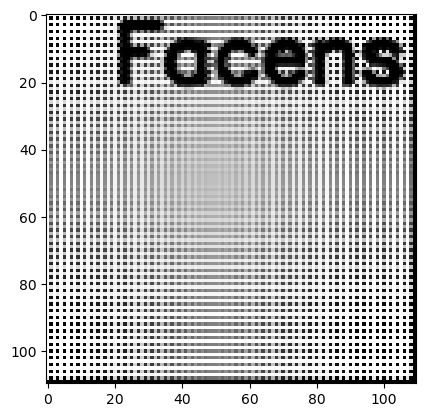

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################

def escala(img, sx, sy):

    # informe a matriz afim da operacao
    # não precisa adicionar a última linha da matriz
    afim = np.array(
        [[sx,0,0],
         [0,sy,0]], dtype=float)
    
    tamanho = (img.shape[0], img.shape[1])
    
    # usa a opencv
    newImg = cv2.warpAffine(src=img, M=afim, dsize=tamanho, flags = cv2.INTER_CUBIC)
            
    return newImg

sx = 2
sy = 2
imgMaior = escala(img, sx, sy)

sx = 0.99
sy = 0.99
imgMenor = escala(img, sx, sy)


##########################################################

# plota a imagem vermelha
plt.imshow(imgMaior, 'gray', vmin=0, vmax=255)
plt.show()

# plota a imagem vermelha
plt.imshow(imgMenor, 'gray', vmin=0, vmax=255)
plt.show()

## Translação

Use uma operação afim para fazer a translação da imagem feita anteriormente.

A operação afim para translação é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1 & 0 & -d_x\\
0 & 1 & -d_y\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

No entanto, na biblioteca OpenCV, em vez de $-d_x$ e $-d_y$, você deve usar $d_x$ e $d_y$:

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1 & 0 & d_x\\
0 & 1 & d_y\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$


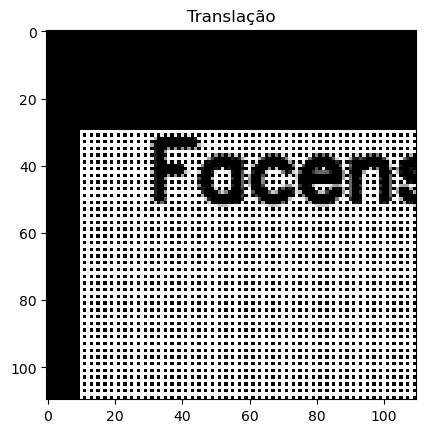

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################

def translation(img, dx, dy):

    # informe a matriz afim da operacao
    # não precisa adicionar a última linha da matriz
    afim = np.array(
        [[1,0,dx],
         [0,1,dy]], dtype=float)
    
    # usa a opencv
    newImg = cv2.warpAffine(src=img, M=afim, dsize=(img.shape[0], img.shape[1]))

            
    return newImg

imgTranslacao = translation(img, dx=10, dy=30)

##########################################################

plt.imshow(imgTranslacao, 'gray', vmin = 0, vmax = 255)
plt.title('Translação')
plt.show()
    

## Cisalhamento

Use uma operação afim para fazer o cisalhamento da imagem feita anteriormente. 

A operação afim para cisalhamento é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1 & -c_v & 0\\
-c_h & 1 & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

No entanto, na biblioteca OpenCV, em vez de $-c_v$ e $-c_h$, você deve usar $c_v$ e $c_h$. Além disso, deve trocá-los de lugar: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1 & c_h & 0\\
c_v & 1 & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$


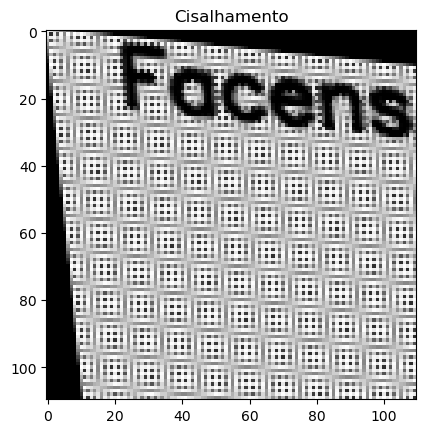

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################

def cisalhamento(img, cVert, cHoriz):

    # informe a matriz afim da operacao
    # não precisa adicionar a última linha da matriz
    afim = np.array(
        [[1,cHoriz,0],
         [cVert,1,0]], dtype=float)
    
    # usa a opencv
    newImg = cv2.warpAffine(src=img, M=afim, dsize=(img.shape[0], img.shape[1]))
            
    return newImg

imgCisalhamento = cisalhamento(img, cVert = 0.1, cHoriz = 0.1   )

##########################################################

plt.imshow(imgCisalhamento, 'gray', vmin = 0, vmax = 255)
plt.title('Cisalhamento')
plt.show()
    

# Rotação

Use uma operação afim para fazer a rotação da imagem feita anteriormente. 

A operação afim para rotação é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0\\
\sin(\theta) & \cos(\theta) & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

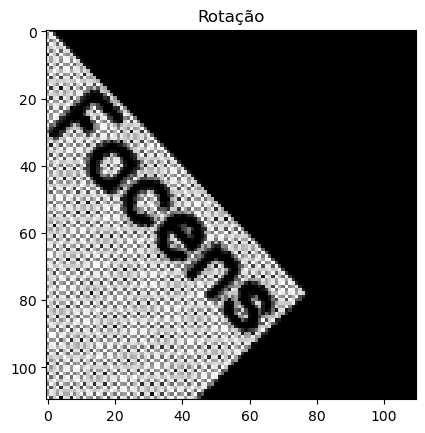

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################

def rotacao(img, theta):

    # informe a matriz afim da operacao
    # não precisa adicionar a última linha da matriz
    afim = np.array(
        [[np.cos(theta),-np.sin(theta),0],
         [np.sin(theta),np.cos(theta),0]], dtype=float)
    
    # usa a opencv
    newImg = cv2.warpAffine(src=img, M=afim, dsize=(img.shape[0], img.shape[1]))
            
    return newImg

imgRotacao = rotacao(img, 0.8)

##########################################################

plt.imshow(imgRotacao, 'gray', vmin = 0, vmax = 255)
plt.title('Rotação')
plt.show()
    

É difícil calcular a matriz afim para fazer a rotação em relação a um determinado ponto. Por exemplo, é muito comum que seja necessário fazer rotação em relação ao centro da imagem. 

Para obter uma matriz afim para fazer a rotação em relação a um determinado ponto, use a função **getRotationMatrix2D** que possui os seguintes parâmetros:
- center: o ponto que será usado como centro da rotação
- angle: ângulo da rotação
- scale: fator de escalamento

Depois de obter a matriz afim, use ela como argumento de entrada para a função **warpAffine**.

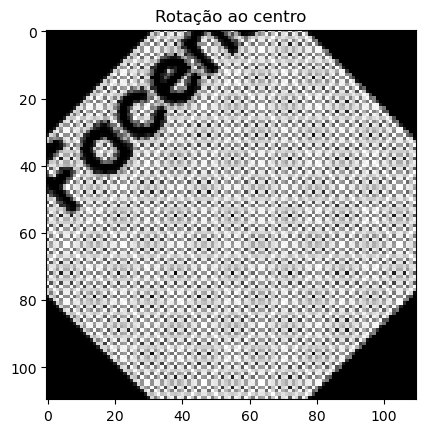

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################

def rotacao_centro2(img, theta):

    # obtem a altura e largura
    height, width = img.shape[0], img.shape[1]
    
    # obtem o centro para criar a matriz de rotacao 
    centro = (width/2, height/2)
    
    # obtem a matriz de rotacao
    rotate_matrix = cv2.getRotationMatrix2D(center=centro, angle=theta, scale=1)
    
    # usa a transformação afim
    imgRotacao = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))
            
    return imgRotacao

imgRotacao = rotacao_centro2(img, 45)

##########################################################

plt.imshow(imgRotacao, 'gray', vmin = 0, vmax = 255)
plt.title('Rotação ao centro')
plt.show()

# Espelhamento

Além das operações principais, uma matriz afim também pode ser usada para outras operações, como o espelhamento.

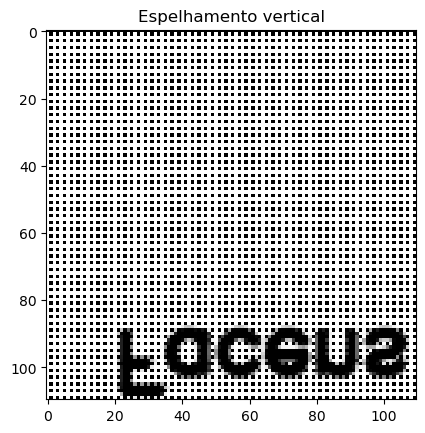

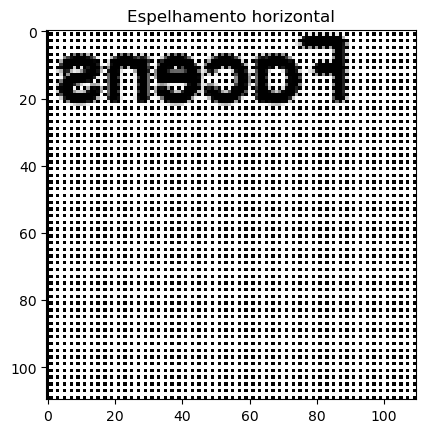

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################

def espelhamentoVertical(img, theta):
    
    height, width = img.shape[0], img.shape[1]

    # informe a matriz afim da operacao
    # não precisa adicionar a última linha da matriz
    afim = np.array(
        [[1,0,0],
         [0,-1,height]], dtype=float)
    
    # usa a opencv
    newImg = cv2.warpAffine(src=img, M=afim, dsize=(img.shape[0], img.shape[1]))
            
    return newImg

def espelhamentoHorizontal(img, theta):
    
    height, width = img.shape[0], img.shape[1]

    # informe a matriz afim da operacao
    # não precisa adicionar a última linha da matriz
    afim = np.array(
        [[-1,0,width],
         [0,1,0]], dtype=float)
    
    # usa a opencv
    newImg = cv2.warpAffine(src=img, M=afim, dsize=(img.shape[0], img.shape[1]))
            
    return newImg

imgEspVertical = espelhamentoVertical(img, 0.8)
imgEspHorizontal = espelhamentoHorizontal(img, 0.8)

##########################################################

plt.imshow(imgEspVertical, 'gray', vmin = 0, vmax = 255)
plt.title('Espelhamento vertical')
plt.show()

plt.imshow(imgEspHorizontal, 'gray', vmin = 0, vmax = 255)
plt.title('Espelhamento horizontal')
plt.show()
    

# Exercícios

Faça uma função que realize a operação de escalamento usando apenas operações matriciais. 